In [9]:
import json
from matplotlib import pyplot as plt
import numpy as np

In [10]:
root = '/home/simon/mount/data'

grid1 = json.load(open(f'{root}/grid.json', 'r'))
grid2 = json.load(open(f'{root}/grid2.json', 'r'))
verb_noun_acc_benchmark_topk10 = json.load(open(f'{root}/verb_noun_acc_benchmark_10.json', 'r'))
verb_noun_acc_benchmark_topk20 = json.load(open(f'{root}/verb_noun_acc_benchmark_20.json', 'r'))

In [29]:


def bar_plot(x1,x2,x3, normalize=False):

    ind = np.arange(len(x1.keys()))
    width = 0.25
    fig = plt.figure()
    ax = fig.add_subplot(111)

    rects1 = ax.bar(ind, x1.values(), width, color='r')
    rects2 = ax.bar(ind+width, x2.values(), width, color='g')
    rects3 = ax.bar(ind-width, x3.values(), width, color='b')

    ax.set_xticks(ind+width)
    ax.set_xticklabels(x1.keys())
    ax.legend((rects1[0], rects2[0], rects3[0]), ("TopF: 1","TopF: 10","TopF: 20"))

    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                    ha='center', va='bottom')
    if not normalize:
        autolabel(rects1)
        autolabel(rects2)
        autolabel(rects3)
    plt.show()



In [32]:
list(grid1.keys())

['TopF_1_WL_25',
 'TopF_1_WL_50',
 'TopF_1_WL_120',
 'TopF_5_WL_25',
 'TopF_5_WL_50',
 'TopF_5_WL_120',
 'TopF_10_WL_25',
 'TopF_10_WL_50',
 'TopF_10_WL_120',
 'TopF_20_WL_25',
 'TopF_20_WL_50',
 'TopF_20_WL_120']

In [94]:
list(grid1[k].values())[0:3]
proba = 1/120
norm_acc = ((np.array(list(grid1[k].values())[0:3]) - proba)/(100-proba))*100
list(grid1[k].values())[0:3]

[0.1541419132752207, 0.32099827882960413, 0.8350730109377602]

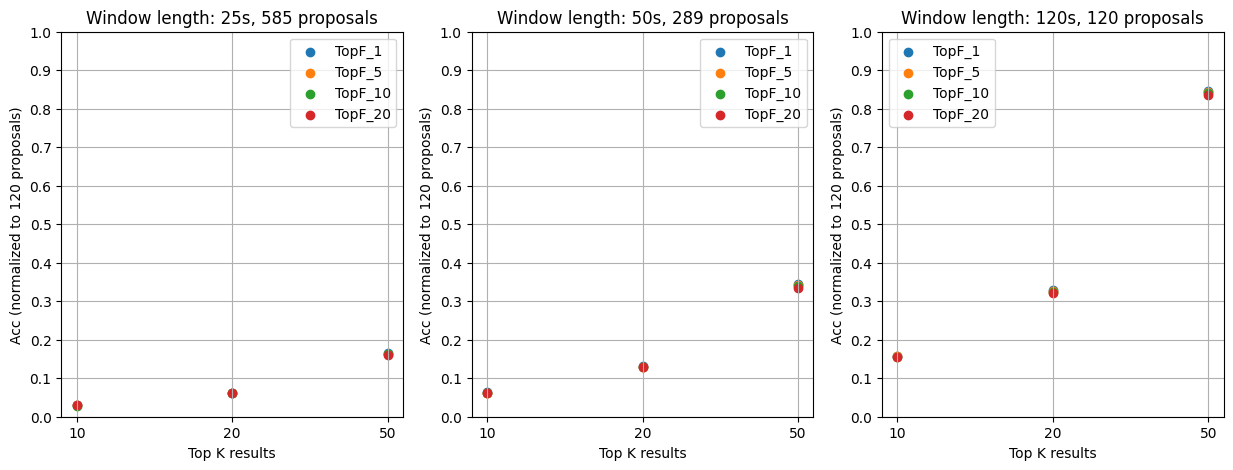

In [114]:
window_lengths = ["25","50","120"]
fig, ax = plt.subplots(ncols=3,figsize=(15,5))
for i in range(3):
    for k in list(grid1.keys())[i::3]:
        nm_proposals = list(grid1[k].values())[3]
        #TODO does normalization to 120 proposals make sense?
        norm_factor = nm_proposals/120
        x = [1,2,3]
        ax[i].scatter(x,np.array(list(grid1[k].values())[0:3]),label=k.split("_WL")[0])
    ax[i].set_ylabel("Acc (normalized to 120 proposals)")
    ax[i].set_ylim(0,1)
    ax[i].set_yticks(np.arange(0,1.1,0.1))
    ax[i].set_xlabel("Top K results")
    ax[i].legend()
    ax[i].set_title(f"Window length: {window_lengths[i]}s, {nm_proposals:.0f} proposals")
    ax[i].set_xticks(x, ["10","20","50"])
    ax[i].grid()

In [188]:
topF1,topF5,topF10,topF20 = [],[],[],[]

for k in grid1.keys():
    if "_1_WL_120" in k:
        topF1.append(grid1[k].values())
    if "_5_WL_120" in k:
        topF5.append(grid1[k].values())
    if "_10_WL_120" in k:
        topF10.append(grid1[k].values())
    if "_20_WL_120" in k:
        topF20.append(grid1[k].values())

([<matplotlib.axis.YTick at 0x7efd1350f3a0>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

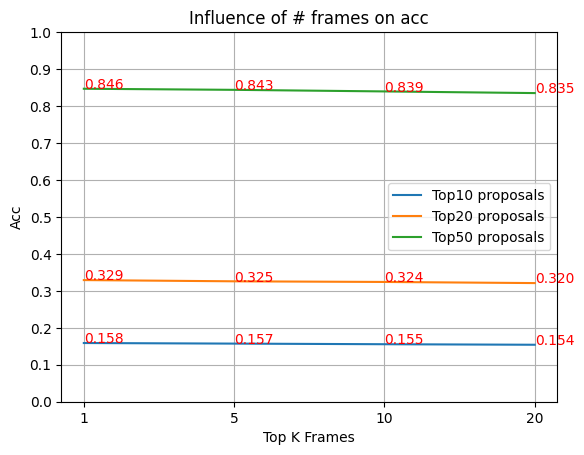

In [189]:
x = [1,2,3,4]
T10 = [list(topF1[0])[0],list(topF5[0])[0],list(topF10[0])[0],list(topF20[0])[0]]
T20 = [list(topF1[0])[1],list(topF5[0])[1],list(topF10[0])[1],list(topF20[0])[1]]
T50 = [list(topF1[0])[2],list(topF5[0])[2],list(topF10[0])[2],list(topF20[0])[2]]

plt.plot(x,T10,label = "Top10 proposals")
for xx, y in zip(x, T10):
    plt.text(xx, y, str(y)[0:5], color="red", fontsize=10)

plt.plot(x,T20,label = "Top20 proposals")
for xx, y in zip(x, T20):
    plt.text(xx, y, str(y)[0:5], color="red", fontsize=10)

for xx, y in zip(x, T50):
    plt.text(xx, y, str(y)[0:5], color="red", fontsize=10)

plt.plot(x,T50,label = "Top50 proposals")
plt.legend()
plt.xticks([1,2,3,4],["1","5","10","20"])
plt.xlabel("Top K Frames")
plt.ylabel("Acc")
plt.title("Influence of # frames on acc")
plt.grid()
plt.yticks(np.arange(0,1.1,0.1))